$\begin{align}
	&u_t + c(x)u_x = 0, \text{ em } [0,5] \times [0,6.4], \\
	&u(x,0) = f(x), \\~\\
	&c(x) = 1/5+\sin(x-1)^2, \\
	&f(x) = e^{-100(x-1)^2}
\end{align}$

In [14]:
using Plots, JLD, Random
Random.seed!(123)

TaskLocalRNG()

In [15]:
function Upwind(u0,x,t,λ)
	u = zeros(length(t),length(x))
	u[1,:] = u0
	for n = 1:length(t)-1
		u[n+1,1] = 0 
		for j = 2:length(x)
			u[n+1,j] = u[n,j] - λ[j]*(u[n,j] - u[n,j-1])
		end 
	end
	return u
end

Upwind (generic function with 1 method)

In [16]:
xmin = 0; xmax = 5; Δx = 0.01
tmin = 0; tmax = 6.4; Δt = Δx/1.2
x = xmin:Δx:xmax; t = tmin:Δt:tmax
c(x) = 1/5+sin(x-1)^2
λ = c.(x)*Δt/Δx
f(x) = exp(-100*(x-1)^2)
u0 = f.(x)
u = Upwind(u0,x,t,λ);

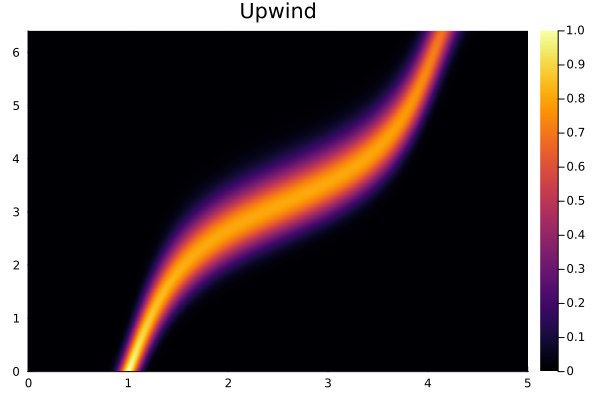

In [17]:
heatmap(x, t, u, title="Upwind")

In [18]:
xt_C = zeros(length(u),2) # C de completo
u_C = zeros(length(u),1)
k = 1
for i = 1:length(t)
    for j = 1:length(x)
        xt_C[k,:] = [x[j],t[i]]
        u_C[k,1] = u[i,j]
        k = k + 1
    end
end

In [25]:
K = zeros(length(u),3)
K[:,1:2] = xt_C
K[:,3] = u_C
K

385269×3 Matrix{Float64}:
 0.0   0.0  3.72008e-44
 0.01  0.0  2.72143e-43
 0.02  0.0  1.95145e-42
 0.03  0.0  1.37161e-41
 0.04  0.0  9.44975e-41
 0.05  0.0  6.3815e-40
 0.06  0.0  4.22415e-39
 0.07  0.0  2.74076e-38
 0.08  0.0  1.74307e-37
 0.09  0.0  1.08661e-36
 ⋮          
 4.92  6.4  2.39835e-6
 4.93  6.4  2.01687e-6
 4.94  6.4  1.69729e-6
 4.95  6.4  1.42934e-6
 4.96  6.4  1.20452e-6
 4.97  6.4  1.01575e-6
 4.98  6.4  8.57129e-7
 4.99  6.4  7.23744e-7
 5.0   6.4  6.115e-7

In [20]:
n_dados = 50000
indices_sorteados = shuffle(1:length(u_C))[1:n_dados]
u_D = u_C[indices_sorteados]
xt_D = xt_C[indices_sorteados,1:2]


50000×2 Matrix{Float64}:
 0.3   4.83333
 2.0   4.41667
 2.38  5.025
 0.79  0.358333
 0.79  4.11667
 3.96  3.44167
 4.97  6.0
 1.8   4.025
 4.16  1.51667
 3.24  0.45
 ⋮     
 0.96  4.38333
 2.25  3.53333
 0.72  5.7
 1.88  2.55
 1.8   1.08333
 3.7   5.06667
 1.61  0.55
 2.58  3.39167
 0.77  2.725

In [21]:
D = [xt_D, u_D]

2-element Vector{Array{Float64}}:
 [0.3 4.833333333333333; 2.0 4.416666666666667; … ; 2.58 3.3916666666666666; 0.77 2.725]
 [1.1783167102124285e-196, 0.0009549050033543392, 0.00015399842464559484, 0.00030082145591666634, 2.438266681145348e-39, 2.7140632428374456e-8, 2.4672259745984654e-9, 0.002532051977946433, 1.604569340310508e-126, 7.098062811508059e-130  …  4.3242103649739556e-162, 6.330230382123236e-24, 0.3039883011121861, 3.306313469791286e-71, 0.8061378821760945, 0.0005966114949313958, 0.5082359530617554, 6.445997433311873e-6, 0.7205734143790418, 3.873489746932313e-26]

In [22]:
save("Upwind_Dados.jld", "D", D)